#Course_03

Natural Language Processing in Tensorflow

##Week 01 

###Word Embedding :

Lets do it using the Keras API :

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:

# Lets now create a list of sentences :
sentences = [ 'I love my good dog', 
              'I love my Cat', 
             'You love my Dog!',
             'Do you think my Dog is Amazing?' ]


# Lets create the Tokenizer object instance:
myTokenizer = Tokenizer(
                        num_words = 100,
                        filters = '!#%$&*+_:?/}{|\~',
                        split = ' ',
                        lower = True,
                        char_level = False,
                        oov_token = None,
                      )

# Now fit it to the sentences list 
myTokenizer.fit_on_texts(sentences)

#Now lets check the indexes assigned to words by the tokenizer instance
word_index = myTokenizer.word_index
print('\nThe words and their corresponding numbers:\n')
print(word_index)

# We need convert now our sentences to numbers -- sequence of numbers using the word index we just created :
sequences = myTokenizer.texts_to_sequences(sentences)
print('\nSequences:\n')
print(sequences)


The words and their corresponding numbers:

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'good': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences:

[[4, 2, 1, 6, 3], [4, 2, 1, 7], [5, 2, 1, 3], [8, 5, 9, 1, 3, 10, 11]]


NOTE about Tokenizer(): 

1. 0 is a reserved token and never gets assigned to a word .
2. Most frequest (num_words  -1) are considered .
3. OOV is Out of Vocab Token .

Now what if your sentences have words that the tokenizer did not see while trianed with myTokenizer.fit_on_texts   ???

It simply ignores them unless during Tokenizer instance cretaion you set the oov_token to some value. It was None in our case so myTokenizer is going to omit the unseen words !!!

In [0]:
test_data = ['Srijeet is a good chap cat']
test_seq = myTokenizer.texts_to_sequences(test_data)
print(test_seq)

[[10, 6, 7]]


Only good and cat gets indexed as myTokenizer do not have the token for words : 

'Srijeet' and 'chap'

In [0]:
# Now lets set the oov_token and test that :

from tensorflow.keras.preprocessing.text import Tokenizer

sentences =  [ 'I love my Dog',
               'I love my Cat',
              'You also love my Dog ??',
              'My little cat is amazing !!!!']

myTokenizer = Tokenizer(
                         num_words = 100,
                         lower = True,
                         split = ' ',
                         filters = '/?<,.>}{][|\+_-=!@#$%^*',
                         char_level = False,
                        oov_token = '<OOV>'

)

myTokenizer.fit_on_texts(sentences)
print(myTokenizer.word_index)
print('\n')


test_data = ['Dog is not elephant !!!']

test_sequence = myTokenizer.texts_to_sequences(test_data)
print('\n')
print(test_sequence)

{'<OOV>': 1, 'my': 2, 'love': 3, 'i': 4, 'dog': 5, 'cat': 6, 'you': 7, 'also': 8, 'little': 9, 'is': 10, 'amazing': 11}




[[5, 10, 1, 1]]


Now lets learn about padding using pad_sequences :

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['I love my dog',
             'I love my cat',
             'You Love my Dog',
             "Do you think my dog is amazing ?"]

myTokenizer = Tokenizer(num_words = 100,
                        filters = '!@#$%^&*(){}[]_+-=|\?/',
                        split = ' ',
                        lower = True,
                        oov_token = "<OOV>",
                        char_level = False)

myTokenizer.fit_on_texts(sentences)
print('My word Indexes : ')
print(myTokenizer.word_index)
print('\n')

sequences = myTokenizer.texts_to_sequences(sentences)
print('Train Data Sequence : ')
print(sequences)

padded = pad_sequences(sequences,
                       maxlen = 5,
                       truncating ='post',
                       padding = 'post',
                       )
print('\n')
print('Train Data with padded sequences : ')
print(padded)


test_data = [ 'I really love my Dog',
             'My Dog loves my Manatee !!!']

test_sequences = myTokenizer.texts_to_sequences(test_data)
print('\nTest Sequence in Tokens : \n')
print(test_sequences)
test_padded = pad_sequences(test_sequences,
                            padding = 'post',
                            truncating = 'post',
                            maxlen = 6)
print('\nPadded test Sequence:\n')
print(test_padded)

My word Indexes : 
{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}


Train Data Sequence : 
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


Train Data with padded sequences : 
[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]

Test Sequence in Tokens : 

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded test Sequence:

[[5 1 3 2 4 0]
 [2 4 1 2 1 0]]


### First Public Dataset and using what we learnt:

In [0]:
# download the dataset from : Sarcasm in News Headlines Dataset by Rishabh Misra
# Upload the zipped file 
# then unzip it :

import os
import zipfile

zip_file_path = '/content/news-headlines-dataset-for-sarcasm-detection.zip'
zip_ref = zipfile.ZipFile(zip_file_path,'r')
zip_ref.extractall('/content/')

'''
The issue is : its a dictionary collection which you will have to modify as list of distionaries for json to read it 

{"article_link": "https://www.huffingtonpost.com/entry/vers", "headline": "secret 'black code' for", "is_sarcastic": 0}
{"article_link": "https://www.huffingtonpost.com/", "headline": "for better and worse", "is_sarcastic": 0}
{"article_link": "https://local.theonion.com/1819576697", "headline": "mom starting to fear", "is_sarcastic": 1}

to 

 {'foo' :  [ {"article_link": "https://www.huffingtonpost.com/entry/vers", "headline": "secret 'black code' for", "is_sarcastic": 0},
    {"article_link": "https://www.huffingtonpost.com/", "headline": "for better and worse", "is_sarcastic": 0},
    {"article_link": "https://local.theonion.com/1819576697", "headline": "mom starting to fear", "is_sarcastic": 1} ] }

'''


In [0]:
!wget --no-check-certificate \
      "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json" \
         --output-document=sarcasm.json

--2020-04-04 18:09:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 2607:f8b0:4001:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-04-04 18:09:40 (152 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [0]:
import json

file_path = '/content/sarcasm.json'

with open(file_path,'r') as f:
  datastore=json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [0]:
print(len(sentences))
print(sentences[1])

26709
the 'roseanne' revival catches up to our thorny political mood, for better and worse


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


myTokenizer = Tokenizer(oov_token = "<OOV>")

myTokenizer.fit_on_texts(sentences)

print('My word Indexes : ')
print(len(myTokenizer.word_index))
print(type(myTokenizer.word_index))
print(myTokenizer.word_index.items())


print('\nThe original sentence :')
print(sentences[2])

sequences = myTokenizer.texts_to_sequences(sentences)
print('\nTrain Data Sequence : ')
print(sequences[2])

padded = pad_sequences(sequences,
                       maxlen = 40,
                       truncating = 'post',
                       padding = 'post',
                       )
print('\nTrain Data with padded sequences : ')
print(padded[2])

print('\nAfter the overall conversion lets see the shape of the dataset that is the new input for us : ')
print(padded.shape)

My word Indexes : 
29657
<class 'dict'>
dict_items([('<OOV>', 1), ('to', 2), ('of', 3), ('the', 4), ('in', 5), ('for', 6), ('a', 7), ('on', 8), ('and', 9), ('with', 10), ('is', 11), ('new', 12), ('trump', 13), ('man', 14), ('from', 15), ('at', 16), ('about', 17), ('you', 18), ('this', 19), ('by', 20), ('after', 21), ('up', 22), ('out', 23), ('be', 24), ('how', 25), ('as', 26), ('it', 27), ('that', 28), ('not', 29), ('are', 30), ('your', 31), ('his', 32), ('what', 33), ('he', 34), ('all', 35), ('just', 36), ('who', 37), ('has', 38), ('will', 39), ('more', 40), ('one', 41), ('into', 42), ('report', 43), ('year', 44), ('why', 45), ('have', 46), ('area', 47), ('over', 48), ('donald', 49), ('u', 50), ('day', 51), ('says', 52), ('s', 53), ('can', 54), ('first', 55), ('woman', 56), ('time', 57), ('like', 58), ('her', 59), ("trump's", 60), ('old', 61), ('no', 62), ('get', 63), ('off', 64), ('an', 65), ('life', 66), ('people', 67), ('obama', 68), ('now', 69), ('house', 70), ('still', 71), ("'",

### Assignment Week 01 :

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

  
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# Convert it to a Python list and paste it here

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
#stopwords = #YOUR CODE HERE


--2020-04-04 18:58:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2020-04-04 18:58:40 (232 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
sentences = []
labels = []

with open("/tmp/bbc-text.csv", 'r') as csvfile:
    # Your Code here
    reader = csv.reader(csvfile,delimiter = ',')

    next(reader,None)

    for row in reader:
      label = row[0]
      data = row[1]

      for word in stopwords:
        token = ' '+word+' '
        data = data.replace(token,' ')
        data = data.replace(' ', ' ')
        
      labels.append(label)
      sentences.append(data)


print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment

In [0]:
tokenizer = Tokenizer(oov_token = "<OOV>") # Your Code Here
tokenizer.fit_on_texts( sentences)# Your Code Here)
word_index = tokenizer.word_index# Your Code here
print(len(word_index))# Your Code Here)
# Expected output
# 29714

29714


In [0]:
sequences = tokenizer.texts_to_sequences(sentences)# Your Code Here
padded = pad_sequences(sequences,
                       maxlen = 2242,
                       #truncating = 'post',
                       padding = 'post',
                       ) # Your Code here
print(padded[0])
print(padded.shape)

# Expected output
# [  96  176 1158 ...    0    0    0]
# (2225, 2442)

[  96  176 1158 ...    0    0    0]
(2225, 2242)


In [0]:
# Your Code Here
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)
print(label_seq)
print(label_word_index)

# Expected Output
# [[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2], [1], [2], [1], [4], [5], [2], [3], [3], [5], [1], [5], [3], [1], [5], [1], [1], [5], [1], [3], [3], [5], [4], [1], [3], [2], [5], [4], [1], [4], [1], [5], [3], [1], [5], [4], [2], [4], [2], [2], [4], [2], [1], [2], [1], [2], [1], [5], [2], [2], [5], [1], [1], [3], [4], [3], [3], [3], [4], [1], [4], [3], [2], [4], [5], [4], [1], [1], [2], [2], [3], [2], [4], [1], [5], [1], [3], [4], [5], [2], [1], [5], [1], [4], [3], [4], [2], [2], [3], [3], [1], [2], [4], [5], [3], [4], [2], [5], [1], [5], [1], [5], [3], [2], [1], [2], [1], [1], [5], [1], [3], [3], [2], [5], [4], [2], [1], [2], [5], [2], [2], [2], [3], [2], [3], [5], [5], [2], [1], [2], [3], [2], [4], [5], [2], [1], [1], [5], [2], [2], [3], [4], [5], [4], [3], [2], [1], [3], [2], [5], [4], [5], [4], [3], [1], [5], [2], [3], [2], [2], [3], [1], [4], [2], [2], [5], [5], [4], [1], [2], [5], [4], [4], [5], [5], [5], [3], [1], [3], [4], [2], [5], [3], [2], [5], [3], [3], [1], [1], [2], [3], [5], [2], [1], [2], [2], [1], [2], [3], [3], [3], [1], [4], [4], [2], [4], [1], [5], [2], [3], [2], [5], [2], [3], [5], [3], [2], [4], [2], [1], [1], [2], [1], [1], [5], [1], [1], [1], [4], [2], [2], [2], [3], [1], [1], [2], [4], [2], [3], [1], [3], [4], [2], [1], [5], [2], [3], [4], [2], [1], [2], [3], [2], [2], [1], [5], [4], [3], [4], [2], [1], [2], [5], [4], [4], [2], [1], [1], [5], [3], [3], [3], [1], [3], [4], [4], [5], [3], [4], [5], [2], [1], [1], [4], [2], [1], [1], [3], [1], [1], [2], [1], [5], [4], [3], [1], [3], [4], [2], [2], [2], [4], [2], [2], [1], [1], [1], [1], [2], [4], [5], [1], [1], [4], [2], [4], [5], [3], [1], [2], [3], [2], [4], [4], [3], [4], [2], [1], [2], [5], [1], [3], [5], [1], [1], [3], [4], [5], [4], [1], [3], [2], [5], [3], [2], [5], [1], [1], [4], [3], [5], [3], [5], [3], [4], [3], [5], [1], [2], [1], [5], [1], [5], [4], [2], [1], [3], [5], [3], [5], [5], [5], [3], [5], [4], [3], [4], [4], [1], [1], [4], [4], [1], [5], [5], [1], [4], [5], [1], [1], [4], [2], [3], [4], [2], [1], [5], [1], [5], [3], [4], [5], [5], [2], [5], [5], [1], [4], [4], [3], [1], [4], [1], [3], [3], [5], [4], [2], [4], [4], [4], [2], [3], [3], [1], [4], [2], [2], [5], [5], [1], [4], [2], [4], [5], [1], [4], [3], [4], [3], [2], [3], [3], [2], [1], [4], [1], [4], [3], [5], [4], [1], [5], [4], [1], [3], [5], [1], [4], [1], [1], [3], [5], [2], [3], [5], [2], [2], [4], [2], [5], [4], [1], [4], [3], [4], [3], [2], [3], [5], [1], [2], [2], [2], [5], [1], [2], [5], [5], [1], [5], [3], [3], [3], [1], [1], [1], [4], [3], [1], [3], [3], [4], [3], [1], [2], [5], [1], [2], [2], [4], [2], [5], [5], [5], [2], [5], [5], [3], [4], [2], [1], [4], [1], [1], [3], [2], [1], [4], [2], [1], [4], [1], [1], [5], [1], [2], [1], [2], [4], [3], [4], [2], [1], [1], [2], [2], [2], [2], [3], [1], [2], [4], [2], [1], [3], [2], [4], [2], [1], [2], [3], [5], [1], [2], [3], [2], [5], [2], [2], [2], [1], [3], [5], [1], [3], [1], [3], [3], [2], [2], [1], [4], [5], [1], [5], [2], [2], [2], [4], [1], [4], [3], [4], [4], [4], [1], [4], [4], [5], [5], [4], [1], [5], [4], [1], [1], [2], [5], [4], [2], [1], [2], [3], [2], [5], [4], [2], [3], [2], [4], [1], [2], [5], [2], [3], [1], [5], [3], [1], [2], [1], [3], [3], [1], [5], [5], [2], [2], [1], [4], [4], [1], [5], [4], [4], [2], [1], [5], [4], [1], [1], [2], [5], [2], [2], [2], [5], [1], [5], [4], [4], [4], [3], [4], [4], [5], [5], [1], [1], [3], [2], [5], [1], [3], [5], [4], [3], [4], [4], [2], [5], [3], [4], [3], [3], [1], [3], [3], [5], [4], [1], [3], [1], [5], [3], [2], [2], [3], [1], [1], [1], [5], [4], [4], [2], [5], [1], [3], [4], [3], [5], [4], [4], [2], [2], [1], [2], [2], [4], [3], [5], [2], [2], [2], [2], [2], [4], [1], [3], [4], [4], [2], [2], [5], [3], [5], [1], [4], [1], [5], [1], [4], [1], [2], [1], [3], [3], [5], [2], [1], [3], [3], [1], [5], [3], [2], [4], [1], [2], [2], [2], [5], [5], [4], [4], [2], [2], [5], [1], [2], [5], [4], [4], [2], [2], [1], [1], [1], [3], [3], [1], [3], [1], [2], [5], [1], [4], [5], [1], [1], [2], [2], [4], [4], [1], [5], [1], [5], [1], [5], [3], [5], [5], [4], [5], [2], [2], [3], [1], [3], [4], [2], [3], [1], [3], [1], [5], [1], [3], [1], [1], [4], [5], [1], [3], [1], [1], [2], [4], [5], [3], [4], [5], [3], [5], [3], [5], [5], [4], [5], [3], [5], [5], [4], [4], [1], [1], [5], [5], [4], [5], [3], [4], [5], [2], [4], [1], [2], [5], [5], [4], [5], [4], [2], [5], [1], [5], [2], [1], [2], [1], [3], [4], [5], [3], [2], [5], [5], [3], [2], [5], [1], [3], [1], [2], [2], [2], [2], [2], [5], [4], [1], [5], [5], [2], [1], [4], [4], [5], [1], [2], [3], [2], [3], [2], [2], [5], [3], [2], [2], [4], [3], [1], [4], [5], [3], [2], [2], [1], [5], [3], [4], [2], [2], [3], [2], [1], [5], [1], [5], [4], [3], [2], [2], [4], [2], [2], [1], [2], [4], [5], [3], [2], [3], [2], [1], [4], [2], [3], [5], [4], [2], [5], [1], [3], [3], [1], [3], [2], [4], [5], [1], [1], [4], [2], [1], [5], [4], [1], [3], [1], [2], [2], [2], [3], [5], [1], [3], [4], [2], [2], [4], [5], [5], [4], [4], [1], [1], [5], [4], [5], [1], [3], [4], [2], [1], [5], [2], [2], [5], [1], [2], [1], [4], [3], [3], [4], [5], [3], [5], [2], [2], [3], [1], [4], [1], [1], [1], [3], [2], [1], [2], [4], [1], [2], [2], [1], [3], [4], [1], [2], [4], [1], [1], [2], [2], [2], [2], [3], [5], [4], [2], [2], [1], [2], [5], [2], [5], [1], [3], [2], [2], [4], [5], [2], [2], [2], [3], [2], [3], [4], [5], [3], [5], [1], [4], [3], [2], [4], [1], [2], [2], [5], [4], [2], [2], [1], [1], [5], [1], [3], [1], [2], [1], [2], [3], [3], [2], [3], [4], [5], [1], [2], [5], [1], [3], [3], [4], [5], [2], [3], [3], [1], [4], [2], [1], [5], [1], [5], [1], [2], [1], [3], [5], [4], [2], [1], [3], [4], [1], [5], [2], [1], [5], [1], [4], [1], [4], [3], [1], [2], [5], [4], [4], [3], [4], [5], [4], [1], [2], [4], [2], [5], [1], [4], [3], [3], [3], [3], [5], [5], [5], [2], [3], [3], [1], [1], [4], [1], [3], [2], [2], [4], [1], [4], [2], [4], [3], [3], [1], [2], [3], [1], [2], [4], [2], [2], [5], [5], [1], [2], [4], [4], [3], [2], [3], [1], [5], [5], [3], [3], [2], [2], [4], [4], [1], [1], [3], [4], [1], [4], [2], [1], [2], [3], [1], [5], [2], [4], [3], [5], [4], [2], [1], [5], [4], [4], [5], [3], [4], [5], [1], [5], [1], [1], [1], [3], [4], [1], [2], [1], [1], [2], [4], [1], [2], [5], [3], [4], [1], [3], [4], [5], [3], [1], [3], [4], [2], [5], [1], [3], [2], [4], [4], [4], [3], [2], [1], [3], [5], [4], [5], [1], [4], [2], [3], [5], [4], [3], [1], [1], [2], [5], [2], [2], [3], [2], [2], [3], [4], [5], [3], [5], [5], [2], [3], [1], [3], [5], [1], [5], [3], [5], [5], [5], [2], [1], [3], [1], [5], [4], [4], [2], [3], [5], [2], [1], [2], [3], [3], [2], [1], [4], [4], [4], [2], [3], [3], [2], [1], [1], [5], [2], [1], [1], [3], [3], [3], [5], [3], [2], [4], [2], [3], [5], [5], [2], [1], [3], [5], [1], [5], [3], [3], [2], [3], [1], [5], [5], [4], [4], [4], [4], [3], [4], [2], [4], [1], [1], [5], [2], [4], [5], [2], [4], [1], [4], [5], [5], [3], [3], [1], [2], [2], [4], [5], [1], [3], [2], [4], [5], [3], [1], [5], [3], [3], [4], [1], [3], [2], [3], [5], [4], [1], [3], [5], [5], [2], [1], [4], [4], [1], [5], [4], [3], [4], [1], [3], [3], [1], [5], [1], [3], [1], [4], [5], [1], [5], [2], [2], [5], [5], [5], [4], [1], [2], [2], [3], [3], [2], [3], [5], [1], [1], [4], [3], [1], [2], [1], [2], [4], [1], [1], [2], [5], [1], [1], [4], [1], [2], [3], [2], [5], [4], [5], [3], [2], [5], [3], [5], [3], [3], [2], [1], [1], [1], [4], [4], [1], [3], [5], [4], [1], [5], [2], [5], [3], [2], [1], [4], [2], [1], [3], [2], [5], [5], [5], [3], [5], [3], [5], [1], [5], [1], [3], [3], [2], [3], [4], [1], [4], [1], [2], [3], [4], [5], [5], [3], [5], [3], [1], [1], [3], [2], [4], [1], [3], [3], [5], [1], [3], [3], [2], [4], [4], [2], [4], [1], [1], [2], [3], [2], [4], [1], [4], [3], [5], [1], [2], [1], [5], [4], [4], [1], [3], [1], [2], [1], [2], [1], [1], [5], [5], [2], [4], [4], [2], [4], [2], [2], [1], [1], [3], [1], [4], [1], [4], [1], [1], [2], [2], [4], [1], [2], [4], [4], [3], [1], [2], [5], [5], [4], [3], [1], [1], [4], [2], [4], [5], [5], [3], [3], [2], [5], [1], [5], [5], [2], [1], [3], [4], [2], [1], [5], [4], [3], [3], [1], [1], [2], [2], [2], [2], [2], [5], [2], [3], [3], [4], [4], [5], [3], [5], [2], [3], [1], [1], [2], [4], [2], [4], [1], [2], [2], [3], [1], [1], [3], [3], [5], [5], [3], [2], [3], [3], [2], [4], [3], [3], [3], [3], [3], [5], [5], [4], [3], [1], [3], [1], [4], [1], [1], [1], [5], [4], [5], [4], [1], [4], [1], [1], [5], [5], [2], [5], [5], [3], [2], [1], [4], [4], [3], [2], [1], [2], [5], [1], [3], [5], [1], [1], [2], [3], [4], [4], [2], [2], [1], [3], [5], [1], [1], [3], [5], [4], [1], [5], [2], [3], [1], [3], [4], [5], [1], [3], [2], [5], [3], [5], [3], [1], [3], [2], [2], [3], [2], [4], [1], [2], [5], [2], [1], [1], [5], [4], [3], [4], [3], [3], [1], [1], [1], [2], [4], [5], [2], [1], [2], [1], [2], [4], [2], [2], [2], [2], [1], [1], [1], [2], [2], [5], [2], [2], [2], [1], [1], [1], [4], [2], [1], [1], [1], [2], [5], [4], [4], [4], [3], [2], [2], [4], [2], [4], [1], [1], [3], [3], [3], [1], [1], [3], [3], [4], [2], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [3], [1], [4], [4], [1], [4], [2], [5], [2], [1], [2], [4], [4], [3], [5], [2], [5], [2], [4], [3], [5], [3], [5], [5], [4], [2], [4], [4], [2], [3], [1], [5], [2], [3], [5], [2], [4], [1], [4], [3], [1], [3], [2], [3], [3], [2], [2], [2], [4], [3], [2], [3], [2], [5], [3], [1], [3], [3], [1], [5], [4], [4], [2], [4], [1], [2], [2], [3], [1], [4], [4], [4], [1], [5], [1], [3], [2], [3], [3], [5], [4], [2], [4], [1], [5], [5], [1], [2], [5], [4], [4], [1], [5], [2], [3], [3], [3], [4], [4], [2], [3], [2], [3], [3], [5], [1], [4], [2], [4], [5], [4], [4], [1], [3], [1], [1], [3], [5], [5], [2], [3], [3], [1], [2], [2], [4], [2], [4], [4], [1], [2], [3], [1], [2], [2], [1], [4], [1], [4], [5], [1], [1], [5], [2], [4], [1], [1], [3], [4], [2], [3], [1], [1], [3], [5], [4], [4], [4], [2], [1], [5], [5], [4], [2], [3], [4], [1], [1], [4], [4], [3], [2], [1], [5], [5], [1], [5], [4], [4], [2], [2], [2], [1], [1], [4], [1], [2], [4], [2], [2], [1], [2], [3], [2], [2], [4], [2], [4], [3], [4], [5], [3], [4], [5], [1], [3], [5], [2], [4], [2], [4], [5], [4], [1], [2], [2], [3], [5], [3], [1]]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

##Week 02

### First NLP Deep learning Model :

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
!pip install -q tensorflow-datasets

In [0]:
#Now lets import the datasets: 
import tensorflow_datasets as tfds
imdb,info = tfds.load('imdb_reviews',with_info = True,as_supervised = True)

import numpy as np 

train_data , test_data = imdb['train'], imdb['test']
#print(train_data.shape)


training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())


print(len(training_labels))

train_labels_final = np.array(training_labels)
test_labels_final = np.array(testing_labels)
print(train_labels_final.shape)

25000
(25000,)


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

my_num_words = 10000
my_maxlen = 120
embedding_dim = 16


myTokenizer = Tokenizer(num_words = my_num_words,
                        lower = True,
                        filters = "!@#$%^&*()_+-=[]{};':<>?,./",
                        char_level = False,
                        oov_token = '<OOV>',
                        split = ' ',
                        )

myTokenizer.fit_on_texts(training_sentences)

word_indexes = myTokenizer.word_index
#print(word_indexes)

train_sequences = myTokenizer.texts_to_sequences(training_sentences)
#print(train_sequences)

test_sequences = myTokenizer.texts_to_sequences(testing_sentences)
#print(test_sequences)

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen = my_maxlen , padding = 'post',truncating = 'post')
test_padded = pad_sequences(test_sequences,maxlen = my_maxlen , padding = 'post',truncating = 'post')

**embedding dimension** :  It is the number of Dimensions for the vector representing the word encoding.

In [0]:
# Now lets define the neural network :

embedding_dim = 16 

model = tf.keras.Sequential([
                             
        tf.keras.layers.Embedding( input_dim = my_num_words,output_dim = embedding_dim, input_length = my_maxlen,),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 6 , activation = 'relu'),
        tf.keras.layers.Dense(units = 1,activation = 'sigmoid')
])

model.summary()

# inpalce of Flatten() we can use GlobalAveragePooling1D()

model_1 = tf.keras.Sequential([
                             
        tf.keras.layers.Embedding( input_dim = my_num_words,output_dim = embedding_dim, input_length = my_maxlen,),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(units = 6 , activation = 'relu'),
        tf.keras.layers.Dense(units = 1,activation = 'sigmoid')
])

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
__________________________

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),metrics = ['accuracy'])

model_1.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),metrics = ['accuracy'])

In [0]:
model.fit(train_padded,
          train_labels_final,
          epochs = 25,
          validation_data = (test_padded,test_labels_final) )

Epoch 1/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5360 - accuracy: 0.7173 - val_loss: 0.3878 - val_accuracy: 0.8239
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3064 - accuracy: 0.8722 - val_loss: 0.3918 - val_accuracy: 0.8250
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.2265 - accuracy: 0.9092 - val_loss: 0.4147 - val_accuracy: 0.8236
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.1497 - accuracy: 0.9479 - val_loss: 0.4580 - val_accuracy: 0.8166
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0818 - accuracy: 0.9756 - val_loss: 0.5524 - val_accuracy: 0.8006


In [0]:
model_1.fit(train_padded,
          train_labels_final,
          epochs = 2,
          validation_data = (test_padded,test_labels_final) )

Epoch 1/2
782/782 [==============================] - 3s 4ms/step - loss: 0.6221 - accuracy: 0.7212 - val_loss: 0.5138 - val_accuracy: 0.7861
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.4139 - accuracy: 0.8272 - val_loss: 0.3939 - val_accuracy: 0.8251


In [0]:
e  = model.layers[0]    #layer 0 is the embedding layer
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


Now lets try to display the embedding that is the vectorial representation of the words in the higher dimention using tensorflow.embedding plots website 

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_indexes.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_padded[3]))
print(training_sentences[3])

b this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'


In [0]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# for word_num in range(1, my_num_words):
#   word = reverse_word_index[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

# out_v.close()
# out_m.close()

In [0]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

In [0]:
sentence = "I really think this is amazing. honest."
sequence = myTokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1502], [949], [4], [1791], [1791], [4981], [], [22], [2052], [11], [2399], [2333], [], [22], [2052], [11], [14], [], [11], [14], [], [4], [146], [4], [4664], [11], [2399], [1352], [], [], [2052], [1047], [2399], [949], [14], [22], []]


### 2nd NLP deep Learning Model : Sarcasm Dataset 

In [0]:
import tensorflow as tf 

#---------------------------------download the dataset-----------------------------------
!wget --no-check-certificate \
      "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json" \
         --output-document=sarcasm.json

#-----------------------create data for model from download---------------------------
import json
file_path = '/content/sarcasm.json'

with open(file_path,'r') as f:
  datastore=json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

#-----------------------------------Create the training and testing set -----------------------

training_size = 20000


training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
training_labels = np.array(training_labels)

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]
testing_labels = np.array(testing_labels)

#----------------------------------------Fix the hyperparameters---------------------------------

vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'


#------------------------- Building the Tokenizer ---------------------------------------

from tensorflow.keras.preprocessing.text import Tokenizer

myTokenizer = Tokenizer(num_words = vocab_size,
                        filters = "!@#$%^&*()_+-=[]][:;?.,<>/",
                        split = ' ',
                        lower = True,
                        char_level = False,
                        oov_token = oov_tok)

myTokenizer.fit_on_texts(training_sentences)

word_index = myTokenizer.word_index


# --------------------------------- create the sequences ------------------------------------

from tensorflow.keras.preprocessing.sequences import pad_sequences


train_sequences = myTokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(
                             train_sequences,
                             maxlen = max_length,
                             truncating = trunc_type,
                             padding = padding_type,
                            )


test_sequences = myTokenizer.texts_to_sequences(testing_sentences)
test_padded = pad_sequences(
                       test_sequences,
                       maxlen = max_length,
                       truncating = trunc_type,
                       padding = padding_type,
                       )

#---------------------------- Build the Model ------------------------------------------------------

model = tf.keras.models.Sequential([
            tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim ,input_length = max_length),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units = 6, activation = 'relu'),
            tf.keras.layers.Dense(units = 1 , activation = "sigmoid")
])

#----------------------- Compile the Model---------------------------------------------------

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# -------------------- Train the Model------------------------------------------------------

history = model.fit(
                       train_padded,
                       training_labels,
                       epochs = 20,
                       validation_data = (test_padded,testing_labels))



In [0]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']

test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

no_of_epochs = range(len(train_acc))

plt.plot(no_of_epochs,train_acc,'r')
plt.plot(no_of_epochs,test_acc,'b')
plt.title('Training Vs Testing Accuracy')

plt.figure()

plt.plot(no_of_epochs,train_loss,'r')
plt.plot(no_of_epochs,test_loss,'b')
plt.title('Training Vs Testing Loss')
plt.show()

###3rd NLP deep Learning Model : IMDB Subwords :

In [0]:
# # Incase you do not have the updated tensorflow version 2.0.0 alpha0 run either of the below commands:
# # For colab it is not required :

# !pip install tensorflow==2.0.0-alpha0
#!pip install tensorflow --upgrade --force-reinstall

!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1

ERROR! Session/line number was not unique in database. History logging moved to new session 62
     |████████████████████████████████| 87.9MB 53kB/s 
     |████████████████████████████████| 3.1MB 35.3MB/s 
     |████████████████████████████████| 501kB 47.7MB/s 
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


     |████████████████████████████████| 3.0MB 2.7MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
# if you do not have the datasets install then run the code below 
# For colabs not required :

#!pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb,info = tfds.load('imdb_reviews/subwords8k', with_info = True , as_supervised = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
train_data , test_data = imdb['train'],imdb['test']

In [0]:
#lets use the tokenizer of the tfds:

tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

AS YOU CAN SEE WE HAVE KEPT THE PUNTUATIONS ASWELL !!!!

In [0]:
# lets check this encoder / tokenizer :

sample_string = 'Tensorflow, from basics to Mastery!'

tokenized_string = tokenizer.encode(sample_string)
print('tokenized string is : {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original String is : {}'.format(original_string))

tokenized string is : [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 5057, 8050, 7962]
The original String is : Tensorflow, from basics to Mastery!


In [0]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts,tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
5057 ----> Master
8050 ----> y
7962 ----> !


In [0]:
embedding_dim = 64

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(units = 6,activation = 'relu'),
                                    tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 1 

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

# if x is a dataset, generaator , keras.utils.sequence then y need not be mentioned as y will be calculated from x only
# here x is a dataset .

history = model.fit(train_data,epochs = num_epochs,validation_data = test_data)


'''
The code seems to have an issue with RC0. It throws ValueError: logits and labels must have the same shape ((None, 1) vs ()) .
The current official version of the notebook uses beta0 and that works.

Run the below code and restart the runtime and execute from begining 

!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1


'''

25000/25000 [==============================] - 458s 18ms/step - loss: 0.6857 - accuracy: 0.5392 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


'\nThe code seems to have an issue with RC0. It throws ValueError: logits and labels must have the same shape ((None, 1) vs ()) .\nThe current official version of the notebook uses beta0 and that works.\n\n!pip install tensorflow==2.0.0-beta0\n!pip install tensorflow-datasets==1.3.1\n\n\n'

In [0]:
# !pip install tensorflow==2.0.0-beta0
# !pip install tensorflow-datasets==1.3.1

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

###Exercise 2- BBC news archive

This week you will build on last week’s exercise where you tokenized words from the BBC news reports dataset. This dataset contains articles that are classified into a number of different categories. See if you can design a neural network that can be trained on this dataset to accurately determine what words determine what category. Create the vecs.tsv and meta.tsv files and load them into the embedding projector.

In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-04-06 18:57:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.07s   

2020-04-06 18:57:49 (72.2 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
# Fix the hyperparameters value s:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [0]:
sentences = []
labels = []

In [0]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [0]:
# Now lets read the csv file to create our train and tets set :


with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [0]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [0]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [0]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [0]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 - 0s - loss: 1.7730 - accuracy: 0.3635 - val_loss: 1.7457 - val_accuracy: 0.4427
Epoch 2/30
1780/1780 - 0s - loss: 1.7098 - accuracy: 0.4629 - val_loss: 1.6615 - val_accuracy: 0.4472
Epoch 3/30
1780/1780 - 0s - loss: 1.6044 - accuracy: 0.4697 - val_loss: 1.5414 - val_accuracy: 0.4831
Epoch 4/30
1780/1780 - 0s - loss: 1.4576 - accuracy: 0.4893 - val_loss: 1.3816 - val_accuracy: 0.5191
Epoch 5/30
1780/1780 - 0s - loss: 1.2711 - accuracy: 0.5809 - val_loss: 1.2008 - val_accuracy: 0.6135
Epoch 6/30
1780/1780 - 0s - loss: 1.0723 - accuracy: 0.7264 - val_loss: 1.0204 - val_accuracy: 0.7618
Epoch 7/30
1780/1780 - 0s - loss: 0.8808 - accuracy: 0.8371 - val_loss: 0.8626 - val_accuracy: 0.8337
Epoch 8/30
1780/1780 - 0s - loss: 0.7201 - accuracy: 0.8910 - val_loss: 0.7335 - val_accuracy: 0.8764
Epoch 9/30
1780/1780 - 0s - loss: 0.5892 - accuracy: 0.9096 - val_loss: 0.6329 - val_accuracy: 0.8652
Epoch 10/30
1780/1780 - 0s - loss: 

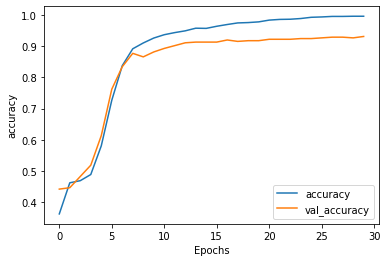

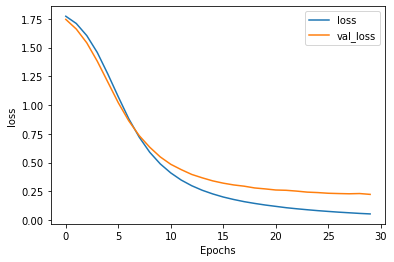

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

##Week 03:

### Install the correct combination version of tensorflow dataset & tensorflow  

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


###Intorduction to LSTM Layers in the Model :

Lets build a sample model with LSTM Layers :

In [0]:

model = tf.keras.models.Sequential([
              tf.keras.layers.Embedding(input_dim = 1000,output_dim = 64, input_length = 500),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences = True)),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
              tf.keras.layers.Dense(units = 64,activation = 'relu'),
              tf.keras.layers.Dense(units = 2 , activation = 'sigmoid')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 128)          66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 175,554
Trainable params: 175,554
Non-trainable params: 0
_________________________________________________________________


###LSTM Model for the imdb subwords dataset :

Lets now use an LSTM included model on the imdb_subwords dataset ;

In [0]:
#-----------------------------Load the data ------------------------------------

import tensorflow_datasets as tfds 
imdb , info = tfds.load('imdb_reviews/subwords8k' , with_info = True , as_supervised = True )

#----------------- train test split --------------------------------------------

train_data , test_data = imdb['train'] , imdb['test']

# ------------------ tokenizer of tfds -----------------------------------------

tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

#----------------------Check the Encoder ---------------------------------------

sample_string = 'Tensowflow is awesome tool ! '

tokenized_output = tokenizer.encode(sample_string)
print(f'The tokenized output is {tokenized_output}')

original_string = tokenizer.decode(tokenized_output)
print(f'The original String is : {original_string}')

# --------------------- Check the mapping --------------------------------------

for ts in tokenized_output:
  print(f'{ts}--------->{tokenizer.decode([ts])}')


#---------------------- Model with the LSTM Layer ------------------------------

embedding_dim = 64

model = tf.keras.models.Sequential([
                tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size , output_dim = embedding_dim),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                tf.keras.layers.Dense(units = 64, activation = 'relu'),
                tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model_1 = tf.keras.models.Sequential([
                tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size , output_dim = embedding_dim ),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences = True)),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(units = 64, activation = 'relu'),
                tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])


#-----------------------------compile the models -------------------------------

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model_1.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])


#------------------ train the model --------------------------------------------

history =  model.fit(train_data , epochs = 3 , validation_data = test_data)
history_1 =  model_1.fit(train_data , epochs = 3 , validation_data = test_data)

#---------------------Check the results -  -------------------------------------

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

plot_graphs(history_1, "accuracy")
plot_graphs(history_1, "loss")



### Model : 01  IMDB Subwords 8K with Single Layer LSTM 

#### Install the correct combination of tensorflow and tensorflow_datasets

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1

#### Import the Libraries

In [0]:
from __future__ import absolute_import , division , print_function , unicode_literals

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


#### Get the data from the dataset :

In [0]:
# get the data :
data , info = tfds.load('imdb_reviews/subwords8k',with_info = True , as_supervised = True)
train_data , test_data = data['train'],data['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


#### Import the Tokenizer()

In [0]:
# lets get the tokenizer from the info

tokenizer = info.features['text'].encoder

####Prepare the data pipeline with the Shuffle and Batch_padding 

In [0]:
Buffer_Size = 10000
batch_size = 64

train_data = train_data.shuffle(Buffer_Size)
train_data = train_data.padded_batch(batch_size,tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(test_data))

####Now lets build the model : 


In [0]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Embedding(tokenizer.vocab_size,64),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
            tf.keras.layers.Dense(units = 64, activation = 'relu'),
            tf.keras.layers.Dense(1,'sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


####Compile the Model :

In [0]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

####Train the Model : 

In [0]:
NUM_EPOCHS = 2
history = model.fit(train_data , epochs = NUM_EPOCHS , validation_data = test_data)

Epoch 1/2
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 1251s 3s/step - loss: 0.5246 - accuracy: 0.7314 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
391/391 [==============================] - 1037s 3s/step - loss: 0.3777 - accuracy: 0.8457 - val_loss: 0.4587 - val_accuracy: 0.7984


In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history , string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

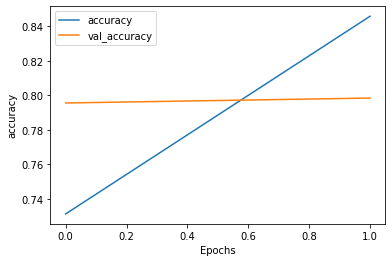

In [0]:
plot_graphs(history,'accuracy')

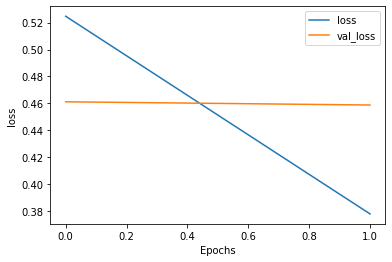

In [0]:
plot_graphs(history,'loss')

### Model 02 : IMDB Subwords 8K with Multilayer LSTM

#### Install the correct combination of tensorflow and tensorflow_datasets

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets= 1.3.1

####Import the Libraries

In [0]:
from __future__ import absolute_import, division, print_function , unicode_literals

In [0]:
import tensorflow as tf 
import tensorflow_datasets as tfds
print(tf.__version__)

####Load the Data 

In [0]:
# Get the data :
data , info = tfds.load('imdb_reviews/subwords8k' , with_info = True , as_supervised = True)
train_data , test_data = data['train'] , data['test']

#### Load the Tokenizer()

In [0]:
# load the tokenizer :
tokenizer = info.features['text'].encoder

#### Prepare the data pipeline with shuffle and batch_padding 

In [0]:
buffer_size = 10000
batch_size = 64

train_data = train_data.shuffle(buffer_size)
train_data = train_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(test_data))

#### Define the Model 

In [0]:
model = tf.keras.models.Sequential([
              tf.keras.layers.Embedding(tokenizer.vocab_size , 64),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64 , return_sequences = True)),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
              tf.keras.layers.Dense(units = 64 , activation  = 'relu'),
              tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_8 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


####Compile the Model 

In [0]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

####Train The Model 

In [0]:
num_epochs = 2
model.fit(train_data, epochs = num_epochs , validation_data = test_data)

#### Plot the Loss and Accuracy graphs for the train vs test dataset

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [0]:
plot_graphs(history, 'accuracy')

In [0]:
plot_graphs(history , 'loss')

### Model 03 : IMDB Subwords 8K with 1 D Convolutional Layer

#### install the correct combination of tensorflow and tensorflow datasets

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets= 1.3.1

####Import the libraries

In [0]:
from __future__ import absolute_import, division , print_function , unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

####Load the Data from tensorflow_datasets

In [0]:
# Get the data :
#data , info = tfds.load('imdb_reviews/subwords8k' , with_info = True , as_supervised = True)
train_data , test_data = data['train'] , data['test']

#### Load the Tokenizer from the tensoflow datsets

In [0]:
# load the tokenizer :
tokenizer = info.features['text'].encoder

####Prepare the data-pipeline with shuffle and batch_padding

In [0]:
buffer_size = 10000
batch_size = 64

train_data = train_data.shuffle(buffer_size)
train_data = train_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(train_data))
test_data = test_data.padded_batch(batch_size , tf.compat.v1.data.get_output_shapes(test_data))

####Define Model with Convolution 1D

In [0]:
model = tf.keras.models.Sequential([
              tf.keras.layers.Embedding(tokenizer.vocab_size , 64),
              tf.keras.layers.Conv1D(128,5 ,activation = 'relu'),
              tf.keras.layers.GlobalAveragePooling1D(),
              tf.keras.layers.Dense(units = 64 , activation  = 'relu'),
              tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


####Compile the Model

In [0]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

####Train the Model

In [0]:
num_epochs = 2
model.fit(train_data, epochs = num_epochs , validation_data = test_data , verbose = 1)

Epoch 1/2
391/391 [==============================] - 177s 454ms/step - loss: 0.3341 - accuracy: 0.8721 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
391/391 [==============================] - 145s 370ms/step - loss: 0.2126 - accuracy: 0.9197 - val_loss: 0.3028 - val_accuracy: 0.8776


####Plot the Accuracy and Loss graphs for Train Vs Test

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

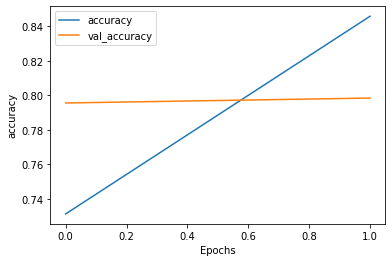

In [0]:
plot_graphs(history, 'accuracy')

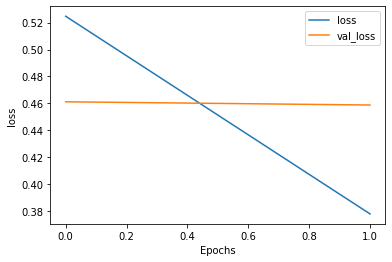

In [0]:
plot_graphs(history , 'loss')

###Model 04 : Sarcasm Dataset with Bidirectional LSTM

#### Insure that tensorflow is updated *italicized text*

In [0]:
!pip install tensorflow==2.0.0-beta0

####Import the libraries :

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

import warnings

2.0.0-beta0


#### Download the data:

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-04-10 13:14:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-04-10 13:14:29 (220 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



####Load the data :

In [0]:
import json

with open('/tmp/sarcasm.json') as f:
  datasets = json.load(f)

sentences = []
labels = []
urls = []

for entries in datasets:
  sentences.append(entries['headline'])
  labels.append(entries['is_sarcastic'])
  urls.append(entries['article_link'])

print("Data size is : ",len(sentences))

Data size is :  26709


#### Divide the data into training and testing datasets :

In [0]:
training_size = 20000

training_sentences  =  sentences[:training_size]
training_labels = labels[:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

print("Training Dataset Size is : ",len(training_sentences))
print("Testing Datset size  is : ",len(testing_sentences))

Training Dataset Size is :  20000
Testing Datset size  is :  6709


#### Now tokenize the data :

In [0]:
#------------------Load the Library----------------------

from tensorflow.keras.preprocessing.text import Tokenizer

#---------------Define the tokenizer instance---------------------
vocab_size = 1000
oov_tok = "<OOV>"


myTokenizer = Tokenizer(  num_words = vocab_size ,
                          split = ' ',
                          filters = '!@#$%^&*()_+[]=-./;?><',
                          char_level = False,
                          oov_token = oov_tok,
                          lower = True)

#------------Fit tokenizer on the train data ----------------------

myTokenizer.fit_on_texts(training_sentences)

word_index = myTokenizer.word_index

#---------------------Tokenize now the train and test data -------------------

training_sequences = myTokenizer.texts_to_sequences(training_sentences)
testing_sequences = myTokenizer.texts_to_sequences(testing_sentences)


#### lets now pad the training and testing sequences

In [0]:

max_length = 120

trunc_type='post'

padding_type='post'

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_padded = pad_sequences( training_sequences,
                                 maxlen = max_length,
                                 padding = padding_type,
                                 truncating = trunc_type,)


testing_padded = pad_sequences( testing_sequences ,
                                maxlen = max_length , 
                                padding =padding_type,
                                truncating = trunc_type)



#### Build The Model Now :

In [0]:

embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 64)                12544     
_________________________________________________________________
dense_14 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model Now :

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Train the Model Now :

In [0]:
import numpy as np 
num_epochs = 10

print(type(training_padded))
print(type(training_labels))  # its a list which needs to be converted into an array numpy array 

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

print(type(training_labels))

history = model.fit(
                    training_padded,
                    training_labels,
                    epochs =  num_epochs,
                    validation_data = (testing_padded , testing_labels),
                    verbose = 1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.4840 - accuracy: 0.7559 - val_loss: 0.3922 - val_accuracy: 0.8190
Epoch 2/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3572 - accuracy: 0.8348 - val_loss: 0.3752 - val_accuracy: 0.8213
Epoch 3/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3334 - accuracy: 0.8498 - val_loss: 0.3718 - val_accuracy: 0.8287
Epoch 4/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3166 - accuracy: 0.8604 - val_loss: 0.3694 - val_accuracy: 0.8322
Epoch 5/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.3029 - accuracy: 0.8644 - val_loss: 0.3721 - val_accuracy: 0.8319
Epoch 6/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.2960 - accuracy: 0.8680 - val_loss: 0.3801 - val_ac

#### Lets now plot the graphs on the model performance

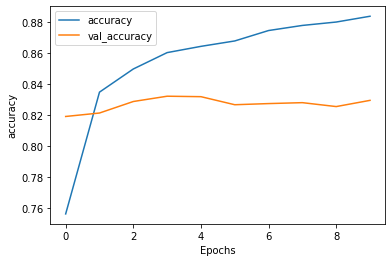

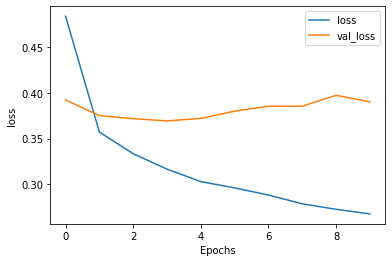

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### Lets save the Model:

In [0]:
model.save("test.h5")

###Model 05 :Sarcasm with 1D Covolutional Layer:

#### Insure that tensorflow is updated 

In [0]:
!pip install tensorflow==2.0.0-beta0

####Import the Libraries:

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

import warnings

2.0.0-beta0


#### Download the data 

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

####Load the Data :

In [0]:
import json

with open('/tmp/sarcasm.json') as f:
  datasets = json.load(f)

sentences = []
labels = []
urls = []

for entries in datasets:
  sentences.append(entries['headline'])
  labels.append(entries['is_sarcastic'])
  urls.append(entries['article_link'])

print("Data size is : ",len(sentences))

####divide the data into training and testing set :

In [0]:
training_size = 20000

training_sentences  =  sentences[:training_size]
training_labels = labels[:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

print("Training Dataset Size is : ",len(training_sentences))
print("Testing Dataset size  is : ",len(testing_sentences))

#### Tokenize the datasets :

In [0]:
#------------------Load the Library----------------------

from tensorflow.keras.preprocessing.text import Tokenizer

#---------------Define the tokenizer instance---------------------
vocab_size = 1000
oov_tok = "<OOV>"


myTokenizer = Tokenizer(  num_words = vocab_size ,
                          split = ' ',
                          filters = '!@#$%^&*()_+[]=-./;?><',
                          char_level = False,
                          oov_token = oov_tok,
                          lower = True)

#------------Fit tokenizer on the train data ----------------------

myTokenizer.fit_on_texts(training_sentences)

word_index = myTokenizer.word_index

#---------------------Tokenize now the train and test data -------------------

training_sequences = myTokenizer.texts_to_sequences(training_sentences)
testing_sequences = myTokenizer.texts_to_sequences(testing_sentences)


####Padding The Data Sequences :

In [0]:

max_length = 120

trunc_type='post'

padding_type='post'

from tensorflow.keras.preprocessing.sequence import pad_sequences

training_padded = pad_sequences( training_sequences,
                                 maxlen = max_length,
                                 padding = padding_type,
                                 truncating = trunc_type,)


testing_padded = pad_sequences( testing_sequences ,
                                maxlen = max_length , 
                                padding =padding_type,
                                truncating = trunc_type)



#### Build the Model :

In [0]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D( 128 , 5 , activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Compile The Model :

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Train The Model :

In [0]:
import numpy as np 
num_epochs = 20

print(type(training_padded))
print(type(training_labels))  # its a list which needs to be converted into an array numpy array 

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

print(type(training_labels))

history = model.fit(
                    training_padded,
                    training_labels,
                    epochs =  num_epochs,
                    validation_data = (testing_padded , testing_labels),
                    verbose = 1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Train on 20000 samples, validate on 6709 samples
Epoch 1/20
20000/20000 [==============================] - 5s 259us/sample - loss: 0.5251 - accuracy: 0.7241 - val_loss: 0.4284 - val_accuracy: 0.8058
Epoch 2/20
20000/20000 [==============================] - 5s 248us/sample - loss: 0.3901 - accuracy: 0.8214 - val_loss: 0.4093 - val_accuracy: 0.8080
Epoch 3/20
20000/20000 [==============================] - 5s 249us/sample - loss: 0.3649 - accuracy: 0.8332 - val_loss: 0.3963 - val_accuracy: 0.8210
Epoch 4/20
20000/20000 [==============================] - 5s 246us/sample - loss: 0.3503 - accuracy: 0.8429 - val_loss: 0.3960 - val_accuracy: 0.8222
Epoch 5/20
20000/20000 [==============================] - 5s 249us/sample - loss: 0.3370 - accuracy: 0.8469 - val_loss: 0.3911 - val_accuracy: 0.8238
Epoch 6/20
20000/20000 [==============================] - 5s 248us/sample - loss: 0.3248 - accuracy: 0.8526 - val_loss: 0.3930 - 

#### Lets now plot the model performances

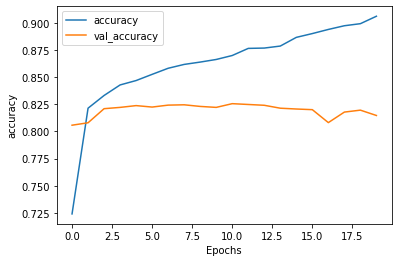

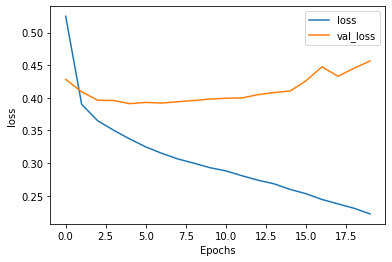

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### Save the Model for Future Use 

In [0]:
model.save('test.h5')

###Model 06 : IMDB Reviews with GRU (and optional LSTM and Conv1D)

#### Ensure that the tensorflow and tensorflow_datasets are having updated versions 

In [0]:
!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets=1.3.1

#### Load the library functions

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.0.0-beta0


####Load the data :

In [0]:
imdb , info = tfds.load('imdb_reviews' , as_supervised = True , with_info = True)

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


#### Divide the data into train and test Sequences :

In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']
print(type(train_data))
print(train_data)

<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int64)>


#### Convert the data into the tokenizer feeding format :

In [0]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
print(type(training_sentences))
print(type(training_labels))

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

print(type(training_sentences))
print(type(training_labels))

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


#### Lets Tokenize the dataset :

In [0]:

#------------------Load The Library ----------------------------
from tensorflow.keras.preprocessing.text import Tokenizer

#----------------define the parameters for tokenizer--------------
vocab_size = 10000
oov_tok = "<OOV>"
embedding_dim = 16

#------------ define the tokenizer object ---------------

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# ----------fit it on the training sentences-------------------

tokenizer.fit_on_texts(training_sentences)

#-----Check on the words learned ----------------------------

word_index = tokenizer.word_index


# ------ Convert to token the training and Testing Data ------

training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)


#### Now lets pad the tokenized inputs :

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 120
padding_type = 'post'
trunc_type = 'post'



training_padded = pad_sequences(training_sequences,
                                maxlen = max_length, 
                                truncating = trunc_type,
                                padding = padding_type)


testing_padded = pad_sequences(
                               testing_sequences,
                               maxlen = max_length,
                               truncating = trunc_type,
                               padding = padding_type)


#### lets Analize how does this Tokenizing working :

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(training_padded[1]))
print(training_sentences[1])

the 'roseanne' revival catches up to our <OOV> political mood for better and worse ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
the 'roseanne' revival catches up to our thorny political mood, for better and worse


#### Define and Compile the Model :

In [0]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 64)                9600      
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


#### Lets Now Train the Model :

In [0]:
num_epochs = 3

history = model.fit(
                    training_padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
                    validation_data = (testing_padded, testing_labels_final) )

Train on 20000 samples, validate on 6709 samples
Epoch 1/3
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.0635 - accuracy: 0.9780 - val_loss: 0.5702 - val_accuracy: 0.8454
Epoch 2/3
20000/20000 [==============================] - 63s 3ms/sample - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.7915 - val_accuracy: 0.8351
Epoch 3/3
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.8609 - val_accuracy: 0.8332


####Lets plot the Model Performance:

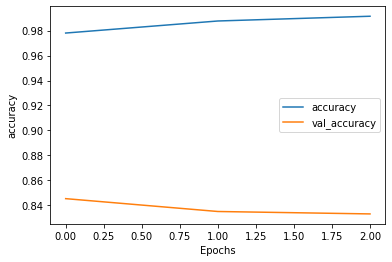

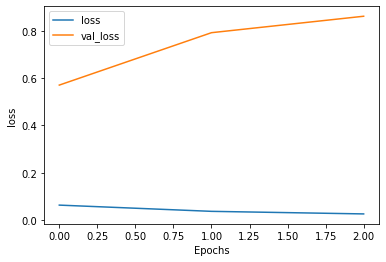

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

####Lets define a model with LSTM :

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 64)                12544     
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 6709 samples
Epoch 1/3
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.4238 - accuracy: 0.7888 - val_loss: 0.3355 - val_accuracy: 0.8527
Epoch 2/3
20000/20000 [=========================

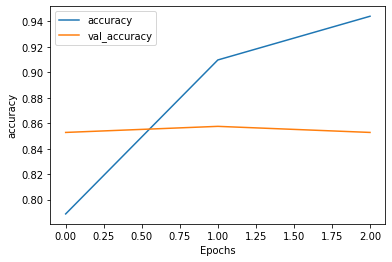

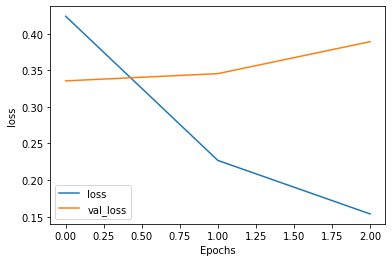

In [0]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

num_epochs = 3

history = model.fit(
                    training_padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
                    validation_data = (testing_padded, testing_labels_final) )


import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

####Model with Conv1D :

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 6709 samples
Epoch 1/3
20000/20000 [==============================] - 6s 294u

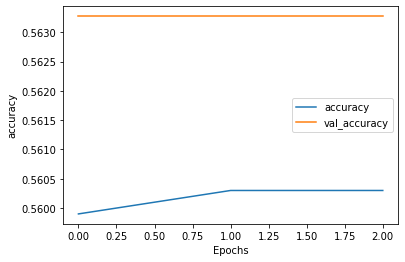

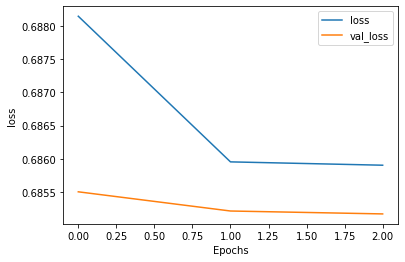

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

num_epochs = 3

history = model.fit(
                    training_padded, 
                    training_labels_final, 
                    epochs = num_epochs, 
                    validation_data = (testing_padded, testing_labels_final) )


import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


###Exercise 3 : Exploring overfitting in NLP

When looking at a number of different types of layer for text classification this week you saw many examples of overfitting -- with one of the major reasons for the overfitting being that your training dataset was quite small, and with a small number of words. Embeddings derived from this may be over generalized also. So for this week’s exercise you’re going to train on a large dataset, as well as using transfer learning of an existing set of embeddings.

The dataset is from:  https://www.kaggle.com/kazanova/sentiment140. I’ve cleaned it up a little, in particular to make the file encoding work with Python CSV reader.

The embeddings that you will transfer learn from are called the GloVe, also known as Global Vectors for Word Representation, available at: https://nlp.stanford.edu/projects/glove/

This course uses a third-party tool, Exercise 3- Exploring overfitting in NLP, to enhance your learning experience. No personal information will be shared with the tool.

In [0]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size= 180000 #Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion = .1

corpus = []


In [0]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

num_sentences = 0

with open("/tmp/training_cleaned.csv") as csvfile:
    
    reader = csv.reader(csvfile, delimiter=',')
    
    for row in reader:
      list_item = []
      list_item.append(row[5])
      
      if row[0] == '0':
        list_item.append(0)
      else:
        list_item.append(1)

      # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
      # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
      # YOUR CODE HERE
      num_sentences = num_sentences + 1
      corpus.append(list_item)


In [0]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


Shuffling the items of a List :

random.shuffle(corpus)

In [0]:
sentences = []
labels = []

random.shuffle(corpus)

for x in range(training_size):
    sentences.append(corpus[x][0])# YOUR CODE HERE)
    labels.append(corpus[x][1])# YOUR CODE HERE)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)# YOUR CODE HERE)

word_index = tokenizer.word_index
vocab_size = len(word_index)# YOUR CODE HERE)

sequences = tokenizer.texts_to_sequences(sentences)# YOUR CODE HERE)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)# YOUR CODE HERE)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [0]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

151198
1


In [0]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt

embeddings_index = {};

with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size + 1, embedding_dim));

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-04-10 16:02:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  74.6MB/s    in 4.4s    

2020-04-10 16:02:25 (74.6 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [0]:
print(len(embeddings_matrix))
# Expected Output
# 138859

151199


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding( vocab_size+1, embedding_dim, input_length = max_length, weights = [embeddings_matrix], trainable=False),
    # YOUR CODE HERE - experiment with combining different types, such as convolutions and LSTMs
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])# YOUR CODE HERE)
model.summary()

num_epochs = 50
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)

print("Training Complete")


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 16, 100)           15119900  
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 15,185,053
Trainable params: 65,153
Non-trainable params: 15,119,900
____________________________________

<Figure size 432x288 with 0 Axes>

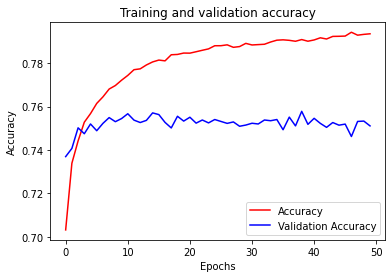

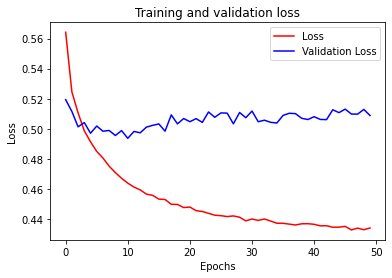

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!

##Week 04

###Predicting Text Problem -- Introduction

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np 
print(tf.__version__)

2.0.0-beta0


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

data = 'In the town of Athy one Jeremy Lanigan \n Battered Away .... \n Srijeet is great'
corpus = data.lower().split('\n')
print(corpus)
print(type(corpus))

['in the town of athy one jeremy lanigan ', ' battered away .... ', ' srijeet is great']
<class 'list'>


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

14


In [0]:
tokenizer.word_index

{'athy': 5,
 'away': 10,
 'battered': 9,
 'great': 13,
 'in': 1,
 'is': 12,
 'jeremy': 7,
 'lanigan': 8,
 'of': 4,
 'one': 6,
 'srijeet': 11,
 'the': 2,
 'town': 3}

Now converting this corpus to Training Data

In [0]:
input_sequence = []

# go through all the lines one-by-one
for line in corpus:
  #create a token_list for the line --covert line from string to list
  # it returns a list of tokens(list of numbers)
  # So take only the first elemnet as we have only one line 
  token_list = tokenizer.texts_to_sequences([line])[0]
  #print(token_list)
  for i in range(1,len(token_list)):
    #print(i)
    n_gram_sequence = token_list[:i+1]
    #print(n_gram_sequence)
    input_sequence.append(n_gram_sequence)

In [0]:
print(input_sequence)

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [9, 10], [11, 12], [11, 12, 13]]


In [0]:
# Now lets find the longes sequence in the corpus :
max_sequence_len = max([len(x) for x in input_sequence])


# now lets pad all the sequences to this length :
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences = np.array(pad_sequences(input_sequence , maxlen = max_sequence_len, padding = 'pre'))
print(input_sequences)
print(input_sequences.shape)

[[ 0  0  0  0  0  0  1  2]
 [ 0  0  0  0  0  1  2  3]
 [ 0  0  0  0  1  2  3  4]
 [ 0  0  0  1  2  3  4  5]
 [ 0  0  1  2  3  4  5  6]
 [ 0  1  2  3  4  5  6  7]
 [ 1  2  3  4  5  6  7  8]
 [ 0  0  0  0  0  0  9 10]
 [ 0  0  0  0  0  0 11 12]
 [ 0  0  0  0  0 11 12 13]]
(10, 8)


In [0]:
# So now we will have all col except last as X and the last col is the prediction :

Xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
print(Xs.shape)
print(labels)

(10, 7)
[ 2  3  4  5  6  7  8 10 12 13]


In [0]:
# One hot encoding of the labels ;
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

### Text Prediction with relatively Large Data:

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0-beta0


In [0]:
# Data is complete line from a poetry and each line is sepatated using a comma :

data = "FROM fairest creatures we desire increase,That thereby beautys rose might never die,But as the riper should by time decease,His tender heir might bear his memory,But thou contracted to thine own bright eyes,Feedst thy lightst flame with self-substantial fuel,Making a famine where abundance lies,Thyself thy foe, to thy sweet self too cruel"

corpus = data.lower().split(',')

print(corpus)

['from fairest creatures we desire increase', 'that thereby beautys rose might never die', 'but as the riper should by time decease', 'his tender heir might bear his memory', 'but thou contracted to thine own bright eyes', 'feedst thy lightst flame with self-substantial fuel', 'making a famine where abundance lies', 'thyself thy foe', ' to thy sweet self too cruel']


In [0]:
# Now lets trainin our Tokenizer on this data :

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
print(len(word_index))
print(type(word_index))
#print(word_index[:10])
word_index['bright']

total_words = len(word_index) + 1
print("Total Words : ",total_words)

52
<class 'dict'>
Total Words :  53


This is Just for understanding :

In [0]:
input_sequence = []

for line in corpus:
  sequence = tokenizer.texts_to_sequences([line])
  sequence = sequence[0]
  print(sequence)
  print('\n')
  for i in range(1,len(sequence)):
    temp = sequence[:i+1]
    print(f'input data tokenized list {i} is : {temp}')
    input_sequence.append(temp)
  
  print("\nFinal Clubbed Output is :",input_sequence)
  break

[7, 8, 9, 10, 11, 12]


input data tokenized list 1 is : [7, 8]
input data tokenized list 2 is : [7, 8, 9]
input data tokenized list 3 is : [7, 8, 9, 10]
input data tokenized list 4 is : [7, 8, 9, 10, 11]
input data tokenized list 5 is : [7, 8, 9, 10, 11, 12]

Final Clubbed Output is : [[7, 8], [7, 8, 9], [7, 8, 9, 10], [7, 8, 9, 10, 11], [7, 8, 9, 10, 11, 12]]


Now Lets creat the inpput for the entire corpus :

In [0]:
input_sequence = []

for line in corpus:
  sequence = tokenizer.texts_to_sequences([line])
  sequence = sequence[0]
  print(sequence)
  for i in range(1,len(sequence)):
    temp = sequence[:i+1]
    input_sequence.append(temp)

print(len(input_sequence))

[7, 8, 9, 10, 11, 12]
[13, 14, 15, 16, 2, 17, 18]
[3, 19, 20, 21, 22, 23, 24, 25]
[4, 26, 27, 2, 28, 4, 29]
[3, 30, 31, 5, 32, 33, 34, 35]
[36, 1, 37, 38, 39, 6, 40, 41]
[42, 43, 44, 45, 46, 47]
[48, 1, 49]
[5, 1, 50, 6, 51, 52]
50


Now we need to pad the input sequence as they are of different lengths . But For that decide the maxlen :

It must be equal to the longest chain in the input sequence :

In [0]:
max_length = max([len(x) for x in input_sequence])
print(max_length)

8


So now lets do the padding :

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_input_sequence = pad_sequences(input_sequence , maxlen =  max_length , padding = 'pre')

print(padded_input_sequence)

[[ 0  0  0  0  0  0  7  8]
 [ 0  0  0  0  0  7  8  9]
 [ 0  0  0  0  7  8  9 10]
 [ 0  0  0  7  8  9 10 11]
 [ 0  0  7  8  9 10 11 12]
 [ 0  0  0  0  0  0 13 14]
 [ 0  0  0  0  0 13 14 15]
 [ 0  0  0  0 13 14 15 16]
 [ 0  0  0 13 14 15 16  2]
 [ 0  0 13 14 15 16  2 17]
 [ 0 13 14 15 16  2 17 18]
 [ 0  0  0  0  0  0  3 19]
 [ 0  0  0  0  0  3 19 20]
 [ 0  0  0  0  3 19 20 21]
 [ 0  0  0  3 19 20 21 22]
 [ 0  0  3 19 20 21 22 23]
 [ 0  3 19 20 21 22 23 24]
 [ 3 19 20 21 22 23 24 25]
 [ 0  0  0  0  0  0  4 26]
 [ 0  0  0  0  0  4 26 27]
 [ 0  0  0  0  4 26 27  2]
 [ 0  0  0  4 26 27  2 28]
 [ 0  0  4 26 27  2 28  4]
 [ 0  4 26 27  2 28  4 29]
 [ 0  0  0  0  0  0  3 30]
 [ 0  0  0  0  0  3 30 31]
 [ 0  0  0  0  3 30 31  5]
 [ 0  0  0  3 30 31  5 32]
 [ 0  0  3 30 31  5 32 33]
 [ 0  3 30 31  5 32 33 34]
 [ 3 30 31  5 32 33 34 35]
 [ 0  0  0  0  0  0 36  1]
 [ 0  0  0  0  0 36  1 37]
 [ 0  0  0  0 36  1 37 38]
 [ 0  0  0 36  1 37 38 39]
 [ 0  0 36  1 37 38 39  6]
 [ 0 36  1 37 38 39  6 40]
 

Now its time to create the Xs and Ys that is the inputs and outputs:

In [0]:
Xs = padded_input_sequence[:,:-1]
ys = padded_input_sequence[:,-1]
print(type(Xs))
print(type(ys))
print(Xs)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ 0  0  0  0  0  0  7]
 [ 0  0  0  0  0  7  8]
 [ 0  0  0  0  7  8  9]
 [ 0  0  0  7  8  9 10]
 [ 0  0  7  8  9 10 11]
 [ 0  0  0  0  0  0 13]
 [ 0  0  0  0  0 13 14]
 [ 0  0  0  0 13 14 15]
 [ 0  0  0 13 14 15 16]
 [ 0  0 13 14 15 16  2]
 [ 0 13 14 15 16  2 17]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  3 19]
 [ 0  0  0  0  3 19 20]
 [ 0  0  0  3 19 20 21]
 [ 0  0  3 19 20 21 22]
 [ 0  3 19 20 21 22 23]
 [ 3 19 20 21 22 23 24]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  4 26]
 [ 0  0  0  0  4 26 27]
 [ 0  0  0  4 26 27  2]
 [ 0  0  4 26 27  2 28]
 [ 0  4 26 27  2 28  4]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  3 30]
 [ 0  0  0  0  3 30 31]
 [ 0  0  0  3 30 31  5]
 [ 0  0  3 30 31  5 32]
 [ 0  3 30 31  5 32 33]
 [ 3 30 31  5 32 33 34]
 [ 0  0  0  0  0  0 36]
 [ 0  0  0  0  0 36  1]
 [ 0  0  0  0 36  1 37]
 [ 0  0  0 36  1 37 38]
 [ 0  0 36  1 37 38 39]
 [ 0 36  1 37 38 39  6]
 [36  1 37 38 39  6 40]
 [ 0  0  0  0  0  0 42]
 [ 0  0  0  0  0

But we need to convert the output token into categorial class :

In [0]:
total_number_words = len(word_index)
ys = tf.keras.utils.to_categorical(ys , num_classes = total_number_words +1) #+1 is to take  care of the OOV token

Now Lets Analyze one Example :

In [0]:
print('\n\n ---------------------- Take one Example-----------------------------------\n\n')

print('\nThe Statemenr from the corpus----->',corpus[0])

print("\n\nToken for the word from is ------> ",tokenizer.word_index['from'])
print("Token for the word fairest is ------> ",tokenizer.word_index['fairest'])
print("Token for the word creatures  is ------> ",tokenizer.word_index['creatures'])
print("Token for the word we is ------> ",tokenizer.word_index['we'])
print("Token for the word desire  is ------> ",tokenizer.word_index['desire'])
print("Token for the word increase  is ------> ",tokenizer.word_index['increase'])


print('\nThe Padded Sequence for the text is---->',padded_input_sequence[4])

print('\nThe Corresponding Xs\n',Xs[4])

print('\nThe Corresponding ys\n',ys[4])
# note it has 53 dimentional output  and 1 @ the 12th position as per the sequence

# you can check the word_index dictionary to confirm the tokens:





 ---------------------- Take one Example-----------------------------------



The Statemenr from the corpus-----> from fairest creatures we desire increase


Token for the word from is ------>  7
Token for the word fairest is ------>  8
Token for the word creatures  is ------>  9
Token for the word we is ------>  10
Token for the word desire  is ------>  11
Token for the word increase  is ------>  12

The Padded Sequence for the text is----> [ 0  0  7  8  9 10 11 12]

The Corresponding Xs
 [ 0  0  7  8  9 10 11]

The Corresponding ys
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


Its time now for Model Development :

In [0]:

input_dim = (len(word_index)+1)
embedding_dim = 64
inputlength = (max_length - 1 ) # as we have taken ys out of it 
no_of_outputs = total_number_words +1  # as during ys categorical creation we kept one for the OOV token also 

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding( input_dim , embedding_dim ,input_length = inputlength),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                    #tf.keras.layers.Dense(len(word_index) , activation = 'relu'),
                                    tf.keras.layers.Dense(len(word_index)+1,activation = 'softmax')
])

    


model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

history = model.fit(Xs , ys , epochs = 1500 , verbose = 1 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50 samples
Epoch 1/1500
50/50 [==============================] - 1s 17ms/sample - loss: 3.9705 - accuracy: 0.0400
Epoch 2/1500
50/50 [==============================] - 0s 381us/sample - loss: 3.9649 - accuracy: 0.0600
Epoch 3/1500
50/50 [==============================] - 0s 267us/sample - loss: 3.9608 - accuracy: 0.1200
Epoch 4/1500
50/50 [==============================] - 0s 327us/sample - loss: 3.9563 - accuracy: 0.0800
Epoch 5/1500
50/50 [==============================] - 0s 286us/sample - loss: 3.9519 - accuracy: 0.0600
Epoch 6/1500
50/50 [==============================] - 0s 314us/sample - loss: 3.9476 - accuracy: 0.0800
Epoch 7/1500
50/50 [==============================] - 0s 281us/sample - loss: 3.9432 - accuracy: 0.0800
Epoch 8/1500
50/50 [==============================] - 0s 298us/sample - loss: 3.9382 - accuracy: 0.1000
Epoch 9/1500
50/50 [==============================] - 0

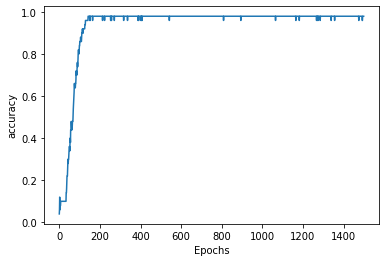

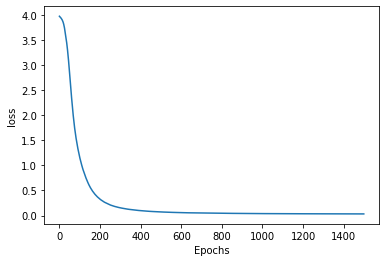

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  # plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Most Important ..lets now test it :

In [0]:
seed_text  = 'My name is Ravi and I am an'
next_words = 5
#tokenizer = Tokenizer()

for _ in range(next_words):
  sequence = tokenizer.texts_to_sequences([seed_text])
  sequence = sequence[0]
  # print(sequence)
  padded_sequence =  pad_sequences([sequence] , maxlen = max_length -1, padding = 'pre')
  # print(padded_sequence)
  # print(type(padded_sequence))
  pred = model.predict_classes(padded_sequence)
  # print(x)
  pred_word = ""
  for word,index in tokenizer.word_index.items():
    if index == pred:
      pred_word = word
      #print('Predicted Word : ',word)
      break
  seed_text = seed_text + " " + pred_word
  print(seed_text)
print('\n',seed_text)



My name is Ravi and I am an thy
My name is Ravi and I am an thy thy
My name is Ravi and I am an thy thy lightst
My name is Ravi and I am an thy thy lightst flame
My name is Ravi and I am an thy thy lightst flame with

 My name is Ravi and I am an thy thy lightst flame with


### Exercise Week 4 Shakespeare Questions:

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0-beta0


In [0]:
#-----------------Download the Data and Create the Corpus-----------------

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

print(type(corpus))
print(len(corpus))

--2020-04-15 08:18:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-15 08:18:19 (128 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

<class 'list'>
2159


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

3211


In [0]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = tf.keras.utils.to_categorical(label, num_classes=total_words)

In [0]:
Embedding_dim = 32


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding( total_words , Embedding_dim , input_length = (max_sequence_len-1) )) # Your Embedding Layer)

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)))# An LSTM Layer)

model.add(tf.keras.layers.Dropout(0.2)) # A dropout layer)

model.add(tf.keras.layers.LSTM(32)) # Another LSTM Layer)

model.add(tf.keras.layers.Dense(total_words/2 , 
                                activation = 'relu' , 
                                kernel_regularizer = tf.keras.regularizers.l2(0.01))) # A Dense Layer including regularizers)

model.add(tf.keras.layers.Dense(total_words , activation = 'softmax'))# A Dense Layer)

# Pick an optimizer

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'] )   

  # Pick a loss function and an optimizer)

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 32)            102752    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 64)            16640     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1605)              52965     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 5,341,639
Trainable params: 5,341,639
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.9048 - accuracy: 0.0224
Epoch 2/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.5226 - accuracy: 0.0242
Epoch 3/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.4279 - accuracy: 0.0247
Epoch 4/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.3210 - accuracy: 0.0277
Epoch 5/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.2335 - accuracy: 0.0283
Epoch 6/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.1646 - accuracy: 0.0285
Epoch 7/100
15462/15462 [==============================] - 24s 2ms/sample - loss: 6.1082 - accuracy: 0.0318
Epoch 8/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.0596 - accuracy: 0.0341
Epoch 9/100
15462/1

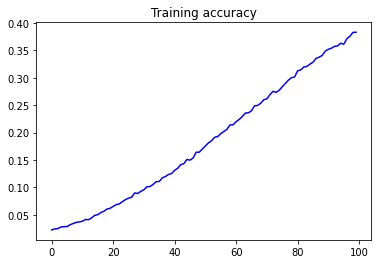

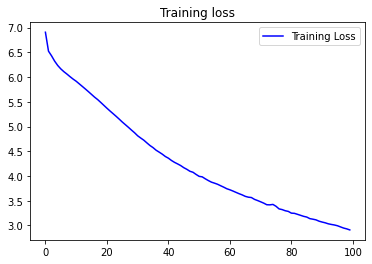

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that be lay with me ' may shine not am blind ill wide thief a trophies of thy precious shame are near engraft thee still still alone alone dearer memory up gracious told so gone so her thing my thoughts his fiery discontent subjects dead translate past brain kings kings staineth staineth staineth staineth staineth greater dyed decay dyed greater afloat crime greater decay new pride survey night doth mother greater afloat bow kings kings cherish ruining ruining well commits gems light made new ill rehearse wantonness give away young so lie in thee without doth is doth spent truth


###generation @Char level:

https://www.tensorflow.org/tutorials/text/text_generation 



Text generation with an RNN for Shakespear Dataset @ Char Level :

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf 
import numpy as np
import os
import time

In [0]:
print(tf.__version__)

2.0.0-beta0


####Download the Shakespeare Dataset :

In [0]:
path_to_file = tf.keras.utils.get_file('Shakespeare.txt','https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

####Read the Data :

In [0]:
text = open(path_to_file,'rb').read().decode(encoding = 'utf-8')
print("Length of the text is : " , len(text))
text[:20]

Length of the text is :  1115394


'First Citizen:\nBefor'

The unique characters in the file :

In [0]:
vocab = sorted(set(text))
print('The number of unique charactes in the vocabulary is : ',len(vocab))
print('\n Some of the chars are :',vocab[:20])

The number of unique charactes in the vocabulary is :  65

 Some of the chars are : ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G']


####Process The Text :

In [0]:
# Creating a mapping from unique characters to indices

char2id = {u:i for i,u in enumerate(vocab)}
#print(char2id.items())
id2char = np.array(vocab)

In [0]:
text_as_int = np.array([char2id[x] for x in text])

In [0]:
print(text_as_int[:20])
print(id2char[18])
print(id2char[1])
print(id2char[15])

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56]
F
 
C


Now we have an integer representation for each character. Notice that we mapped the character as indexes from 0 to `len(unique)`.

In [0]:
print('{')
for char,_ in zip(char2id, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2id[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [0]:
# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


Given a character, or a sequence of characters, what is the most probable next character? This is the task we're training the model to perform. The input to the model will be a sequence of characters, and we train the model to predict the output—the following character at each time step.

Since RNNs maintain an internal state that depends on the previously seen elements, given all the characters computed until this moment, what is the next character?


####Create training examples and targets



Next divide the text into example sequences. Each input sequence will contain `seq_length` characters from the text.

For each input sequence, the corresponding targets contain the same length of text, except shifted one character to the right.

So break the text into chunks of `seq_length+1`. For example, say `seq_length` is 4 and our text is "Hello". The input sequence would be "Hell", and the target sequence "ello".

To do this first use the `tf.data.Dataset.from_tensor_slices` function to convert the text vector into a stream of character indices.

In [0]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

In [0]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

In [0]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [0]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

In [0]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))